In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings ('ignore')
import pickle

In [196]:
df=pd.read_csv("/content/Salary_Dataset_with_Extra_Features.csv")
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [197]:
df.shape

(22770, 8)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [199]:
df.isnull().sum()

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [200]:
print(df["Company Name"])

0                                  Sasken
1        Advanced Millennium Technologies
2                               Unacademy
3                      SnapBizz Cloudtech
4                  Appoids Tech Solutions
                       ...               
22765                    Expert Solutions
22766             Nextgen Innovation Labs
22767                             Fresher
22768                           Accenture
22769                     Thomson Reuters
Name: Company Name, Length: 22770, dtype: object


In [201]:
df["Company Name"]=df["Company Name"].fillna(method='ffill')

In [202]:
df.isnull().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [203]:
df.isnull().any()

Rating               False
Company Name         False
Job Title            False
Salary               False
Salaries Reported    False
Location             False
Employment Status    False
Job Roles            False
dtype: bool

Descriptive Statistical

In [204]:
df.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [205]:
# Encoding categorical variables
le =LabelEncoder()
df['Employment Status'] = le.fit_transform(df['Employment Status'])
df['Job Roles'] = le.fit_transform(df['Job Roles'])
df['Location'] = le.fit_transform(df['Location'])
df['Company Name'] = le.fit_transform(df['Company Name'])
df['Job Title'] = le.fit_transform(df['Job Title'])

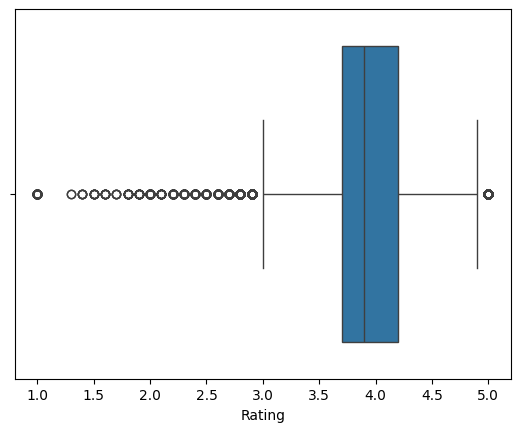

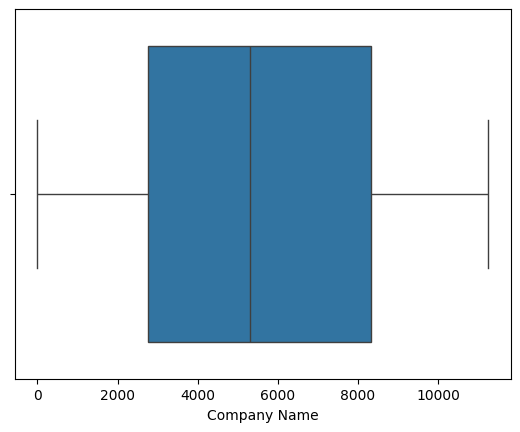

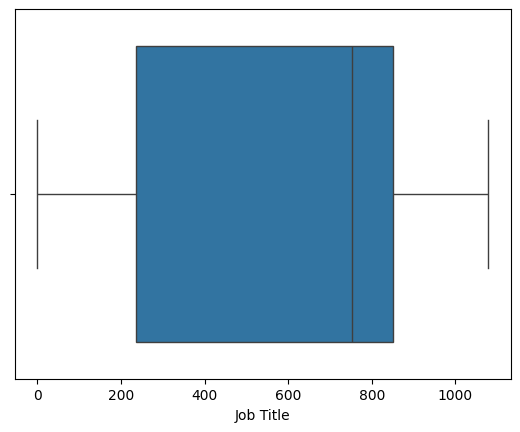

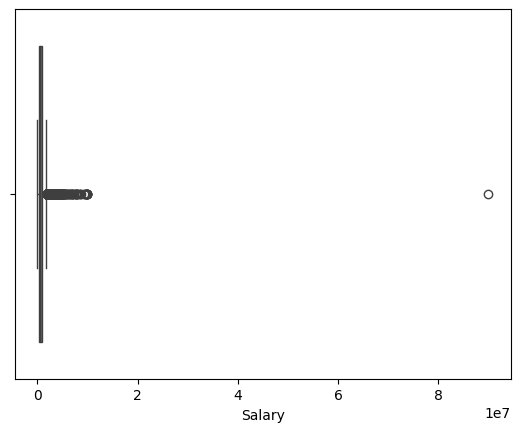

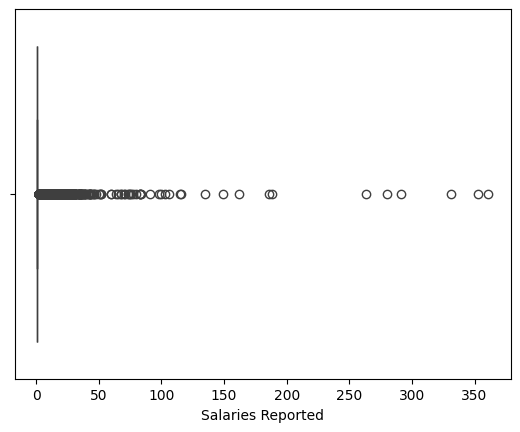

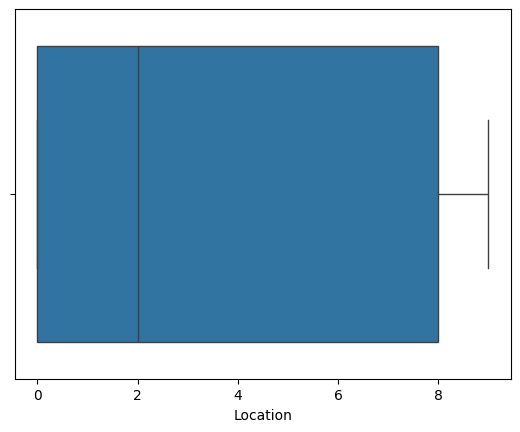

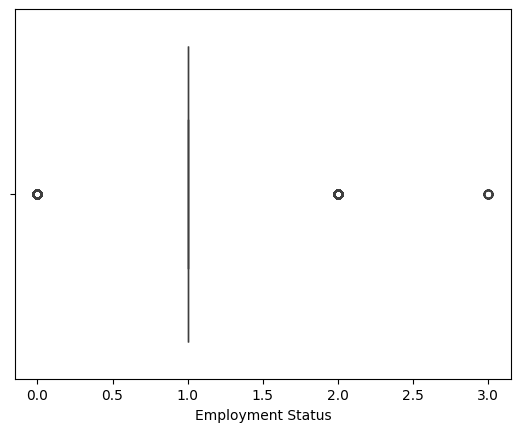

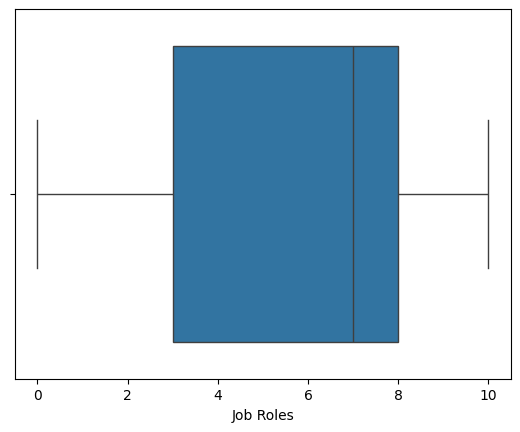

In [206]:
def func(col):
  sns.boxplot(x=col,data=df)
  plt.show()
for i in df.columns:
  func(i)

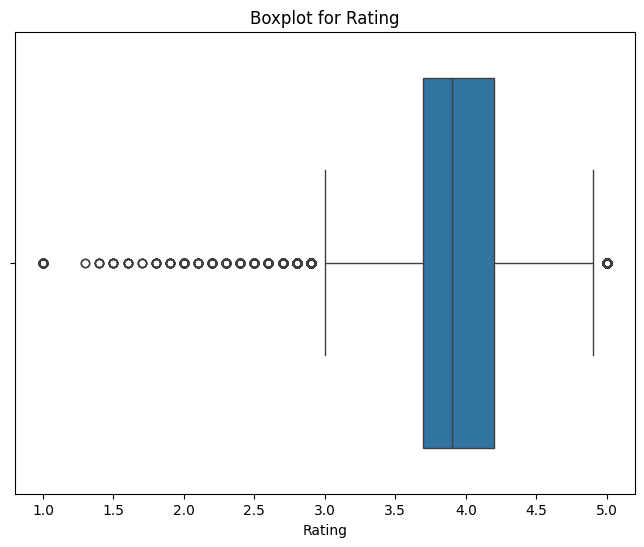

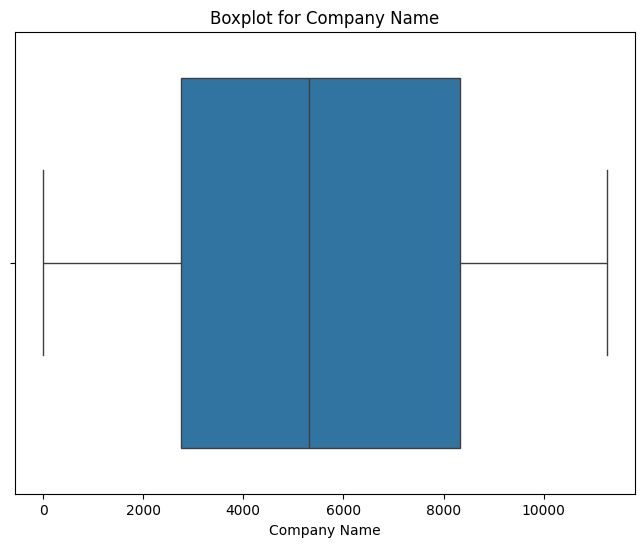

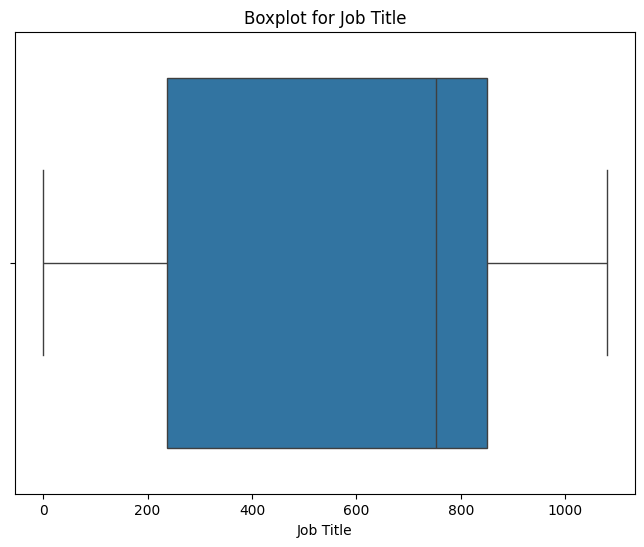

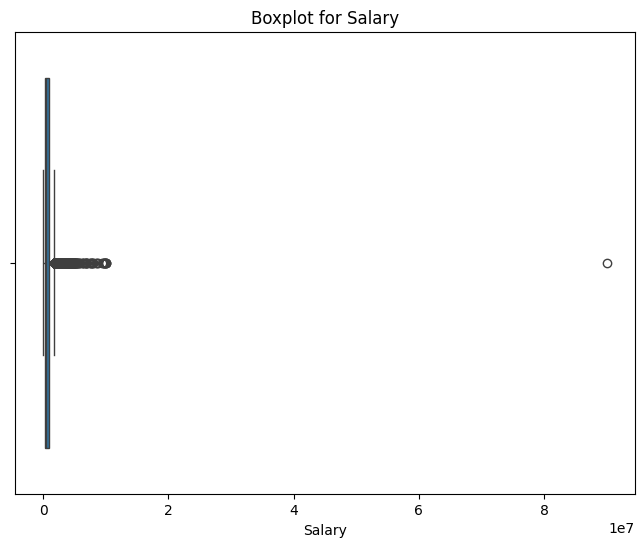

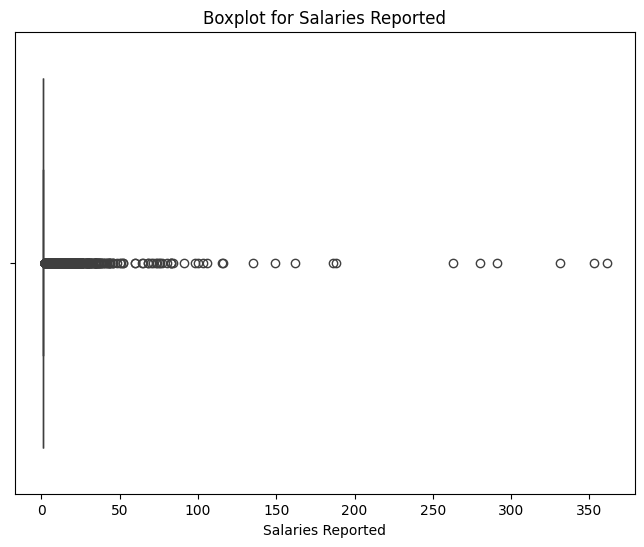

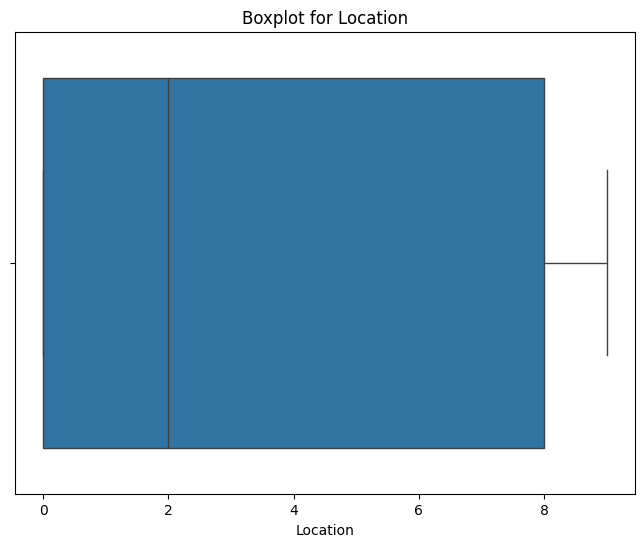

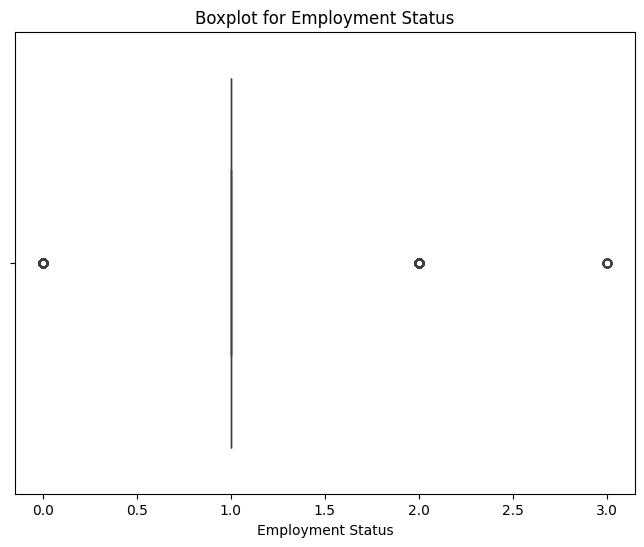

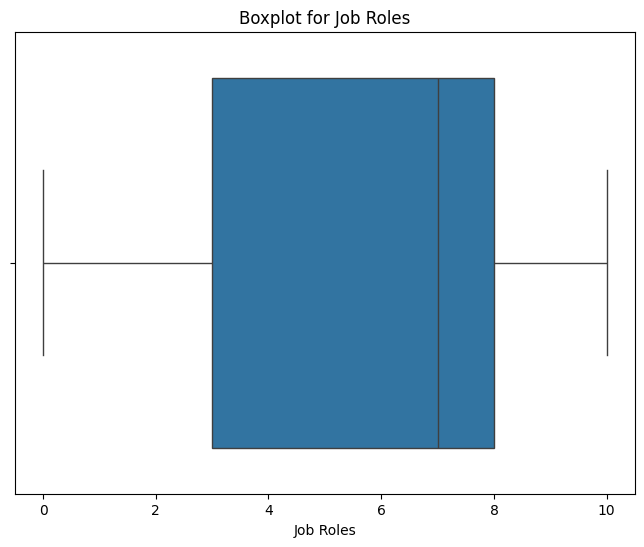

In [207]:
for column in df.columns:
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate quantiles
        quant = df[column].quantile(q=[0.75, 0.25])
        Q3 = quant.loc[0.75]
        Q1 = quant.loc[0.25]

        # Calculate IQR
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with values within the bounds
# Iterate over each column and plot boxplot
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

In [208]:
quant = df['Salary'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)

0.75    900000.0
0.25    300000.0
Name: Salary, dtype: float64
900000.0
300000.0
600000.0
1800000.0
-600000.0


In [209]:
# Calculate Q1, Q3, and IQR for a specific column

Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers and create a new DataFrame
df_filtered = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

# If you want to replace the original df, uncomment the line below
df = df_filtered

<Axes: xlabel='Salary'>

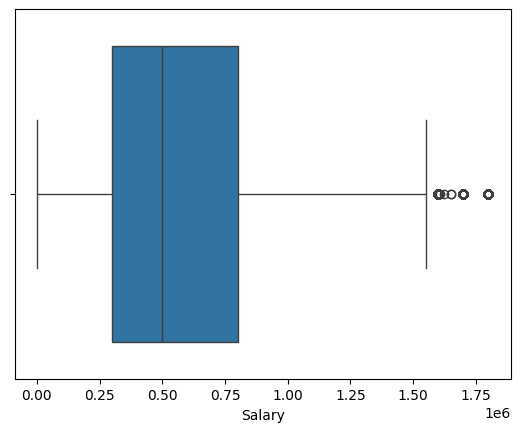

In [210]:
sns.boxplot(x='Salary',data=df)


<Axes: xlabel='Salaries Reported'>

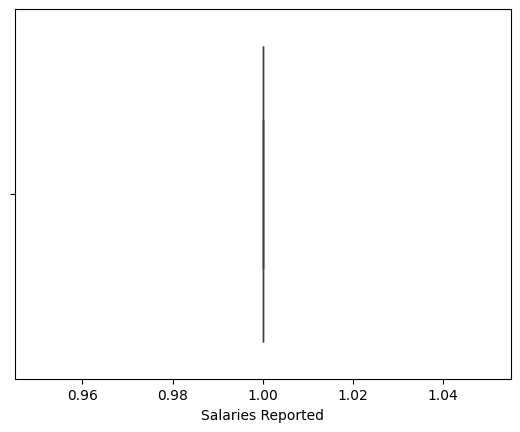

In [211]:
# Calculate Q1, Q3, and IQR for a specific column (replace 'Relevant Column' with the actual column name)
Q1 = df['Salaries Reported'].quantile(0.25)
Q3 = df['Salaries Reported'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers and create a new DataFrame
df_filtered = df[(df['Salaries Reported'] >= lower_bound) & (df['Salaries Reported'] <= upper_bound)]

# If you want to replace the original df, uncomment the line below
df = df_filtered
sns.boxplot(x='Salaries Reported',data=df)

<Axes: xlabel='Rating'>

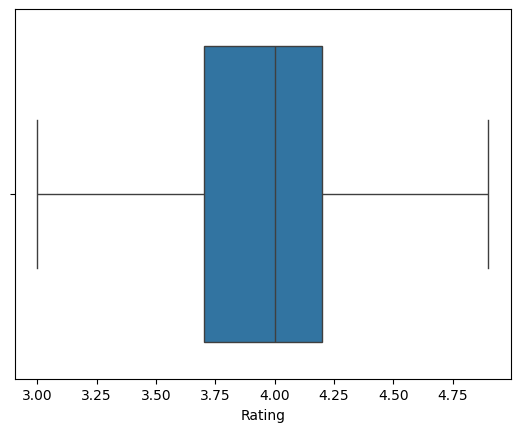

In [212]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers and create a new DataFrame
df_filtered = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]

# If you want to replace the original df, uncomment the line below
df = df_filtered
sns.boxplot(x='Rating',data=df)

<Axes: xlabel='Employment Status'>

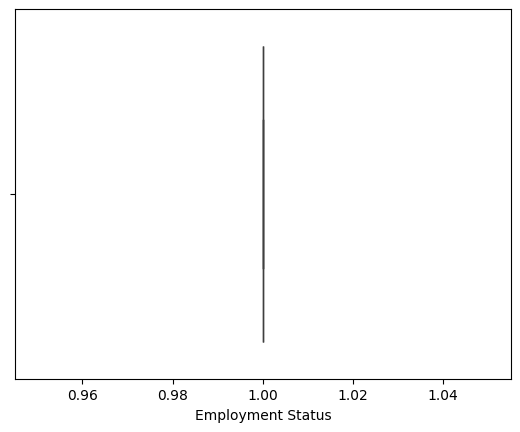

In [213]:
Q1 = df['Employment Status'].quantile(0.25)
Q3 = df['Employment Status'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers and create a new DataFrame
df_filtered = df[(df['Employment Status'] >= lower_bound) & (df['Employment Status'] <= upper_bound)]

# If you want to replace the original df, uncomment the line below
df = df_filtered
sns.boxplot(x='Employment Status',data=df)

**Exploratory Data Analysis**

<b>Visual Analysis </b><br>Univariate analysis

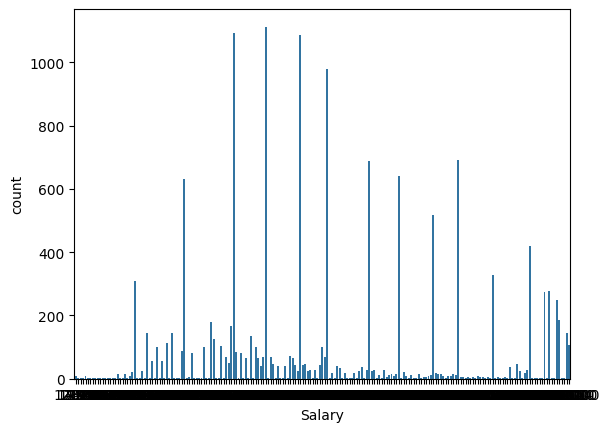

In [214]:

sns.countplot(x='Salary', data=df)
plt.show()


Bivariate analysis

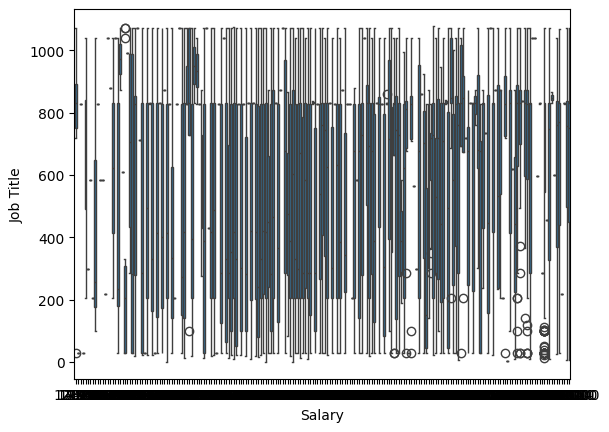

In [215]:
sns.boxplot(x='Salary',y='Job Title', data=df)
plt.show()


Multivariate analysis

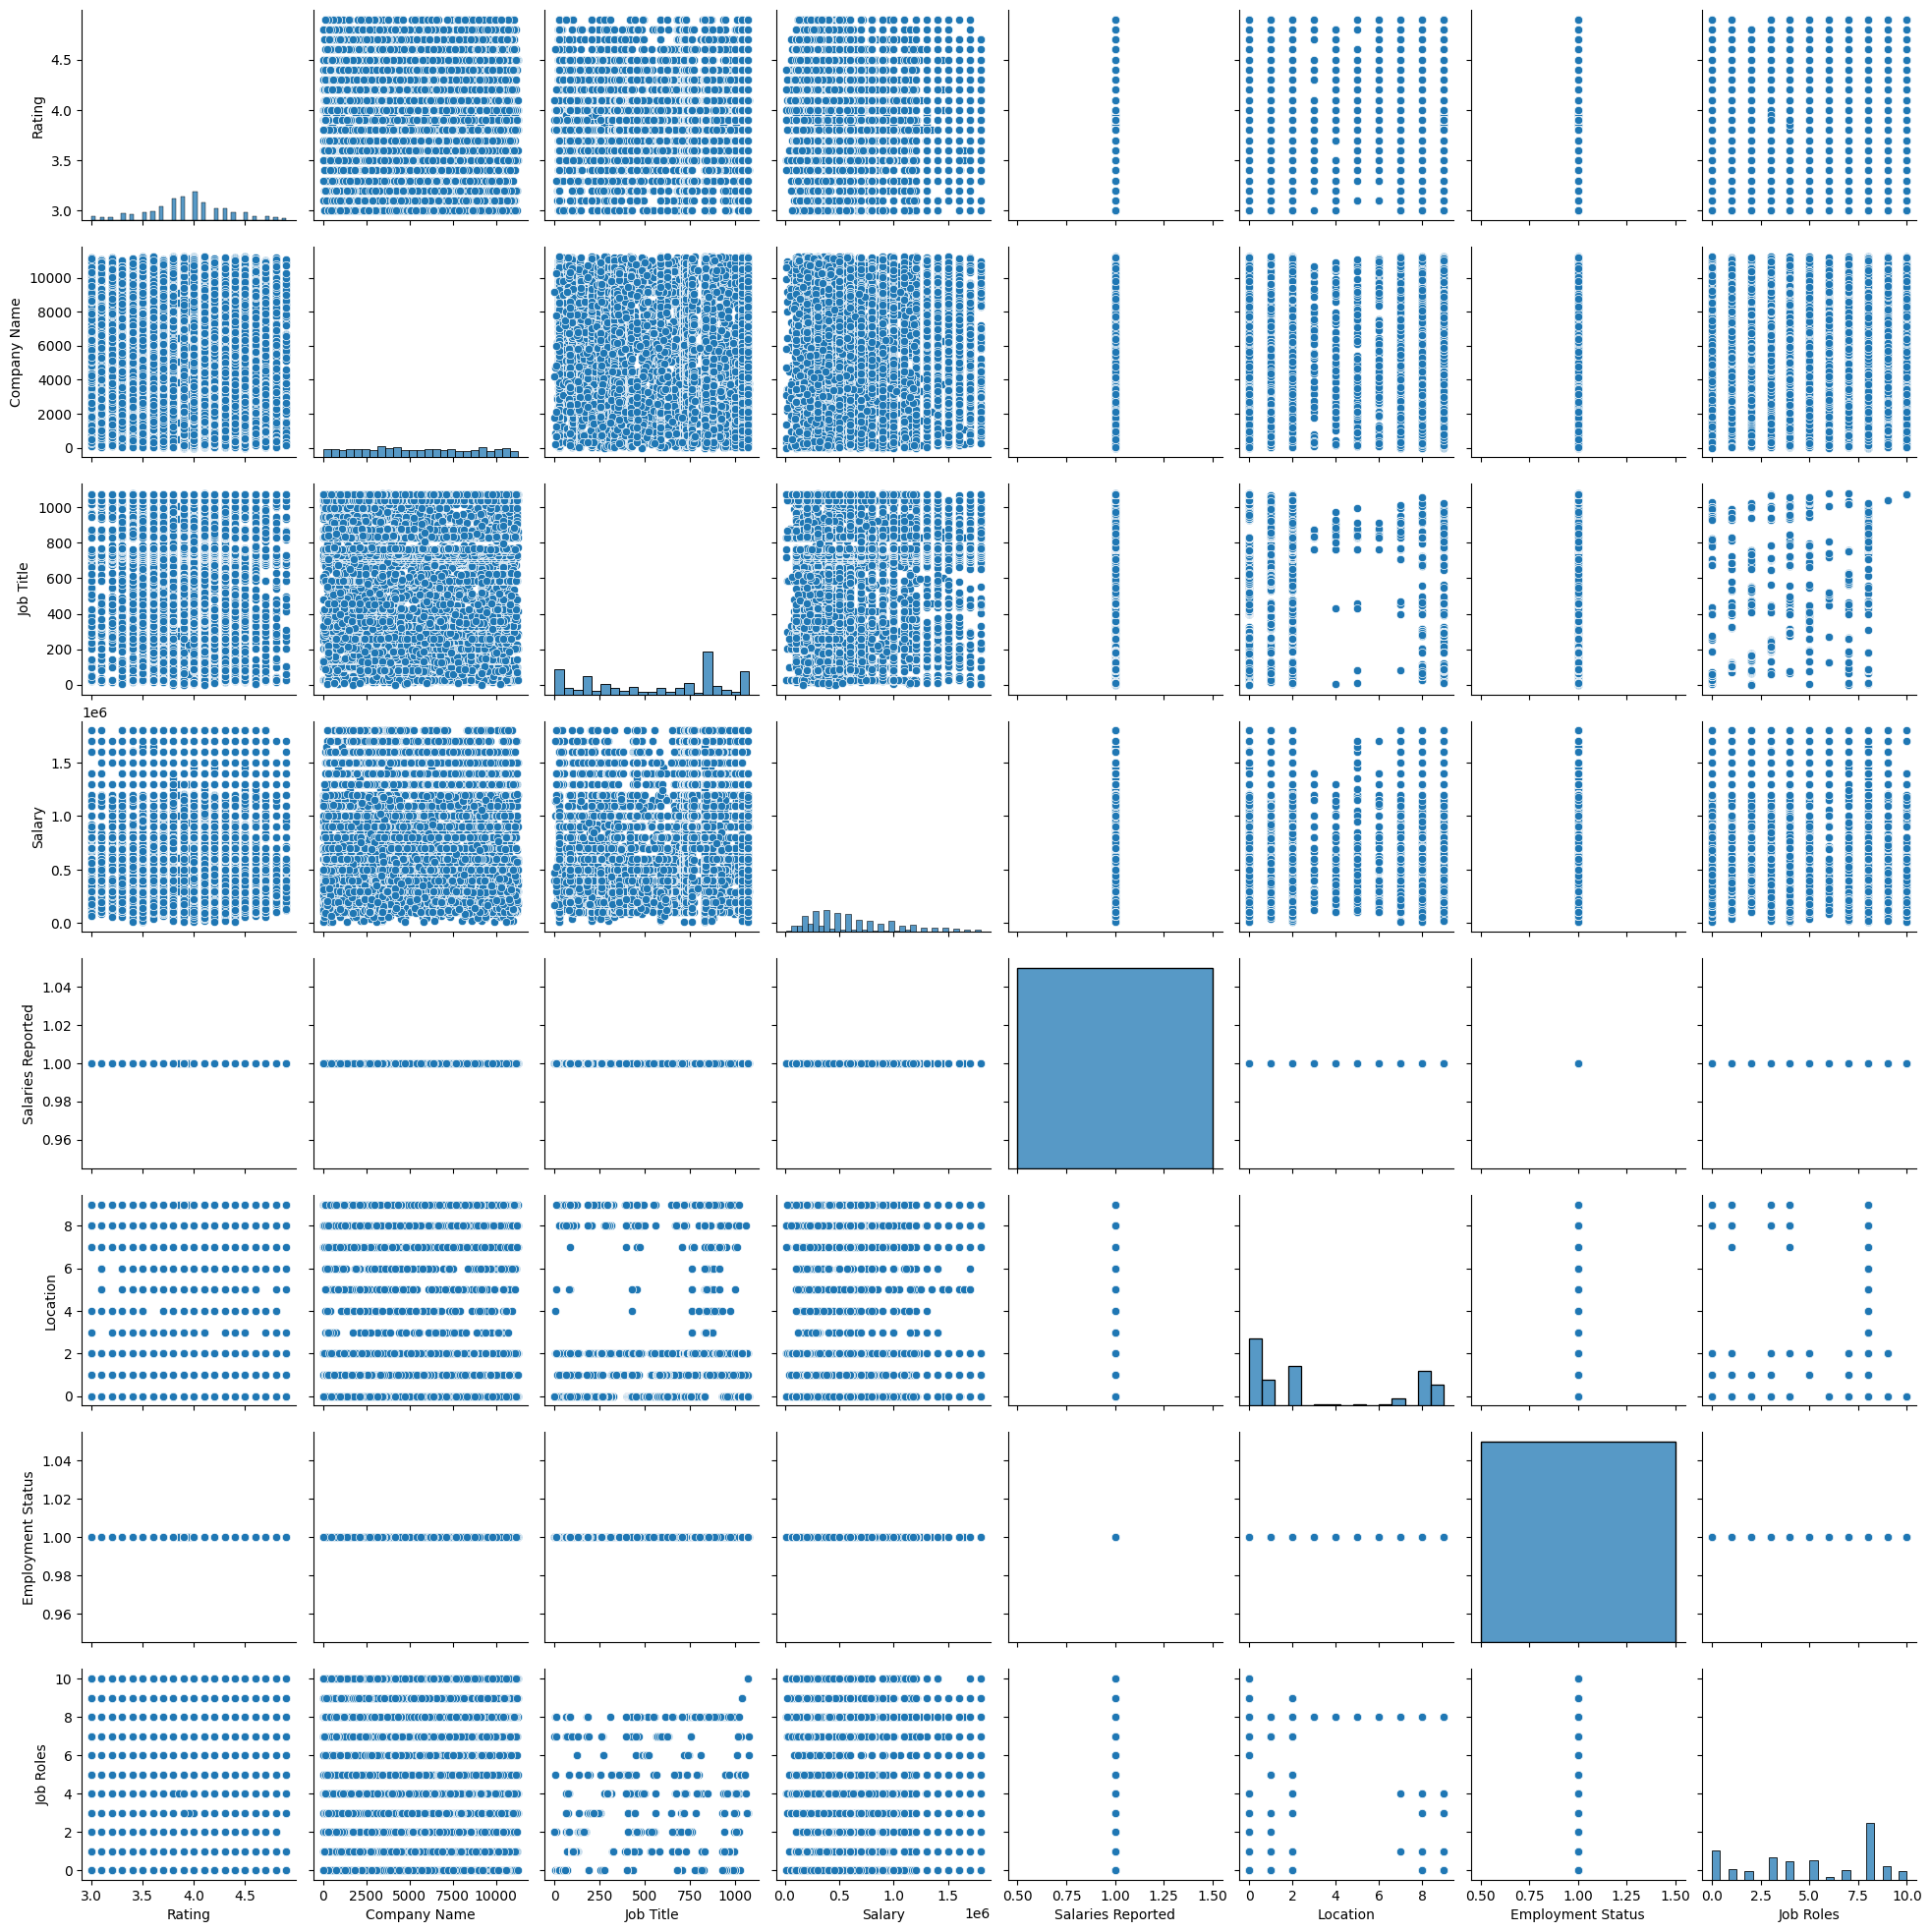

In [216]:
sns.pairplot(df)


In [217]:
X = df.drop(['Salary'], axis=1)
y= df['Salary']

In [218]:
from sklearn.model_selection import train_test_split, GridSearchCV
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2, shuffle=True)
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = 72)
len(X_train), len(X_test)


(9609, 4119)

In [219]:
len(y_train), len(y_test)

(9609, 4119)

spliting data

In [223]:
X = df.drop(['Salary'], axis=1)
y= df['Salary']

In [276]:
from sklearn.model_selection import train_test_split, GridSearchCV
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2, shuffle=True)
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = 72)
len(X_train), len(X_test)

(9609, 4119)

**Model Building**

Decision Tree Model

In [277]:
dtr= DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
x_train_pred = dtr.predict(X_train)
x_test_pred = dtr.predict(X_test)
print(x_train_pred)
print(x_test_pred)

[1300000. 1000000.  600000. ...  264000.  500000.  400000.]
[228000. 192000. 540000. ... 900000. 400000.  57024.]


In [278]:
from sklearn.metrics import r2_score, mean_squared_error

In [289]:
#Decision tree for training data
r2_score(y_train, x_train_pred)*100



99.57761033773629

In [284]:
#Mean Square Error For Decision Tree on Training Data
mean_squared_error(y_train, x_train_pred)

678708779.6213273

In [283]:
#Mean Square Error For Decision Tree on Testing Data
mean_squared_error(y_test, x_test_pred)

271473017575.91995

**Random Forest Model**

In [232]:
rfr= RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [257]:
x_train_pred = rfr.predict(X_train)
x_test_pred = rfr.predict(X_test)


In [272]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate performance metrics for regression
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)

print("Training R-squared:", r2_train)
print("Testing R-squared:", r2_test)

Training MSE: 678708779.6213273
Testing MSE: 271473017575.91995
Training R-squared: 0.9957761033773629
Testing R-squared: -0.6733038946978125


In [263]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for regression evaluation
rmse = mean_squared_error(y_test, x_test_pred, squared=False)
print(rmse)

394794.73116966424


**XG Boost Model**

In [234]:
xg_reg= xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [264]:
x_train_pred = xg_reg.predict(X_train)
x_test_pred = xg_reg.predict(X_test)

In [285]:
r2_score(y_train, x_train_pred)*100

99.57761033773629

In [268]:
# Predict on the test set
xgb_predictions = xg_reg.predict(X_test)

# Now you can use xgb_predictions and y_test for evaluation, e.g.
rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
print(rmse)

379267.48857603717


<b>Linear Regression Model

In [236]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [237]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

Testing the Model

In [238]:
rfr.predict([[0.7,6422,461,1,0,1,3]])

array([682440.])

In [239]:
rfr.predict([[2.5,5116,709,1,9,1,3]])

array([581400.])

In [240]:
rfr.predict([[1.2,4718,1071,1,0,1,5]])

array([645240.])

In [241]:
rfr.predict([[1.2,3412,8042,1,7,1,2]])

array([900614.08])

In [242]:
rfr.predict([[1.8,2342,2218,1021,1,5,2]])

array([793340.48])

<b>Performance Testing & Hyperparameter Tuning

Compare the model

In [243]:
#Random forest for training data
r2_score(y_train, y_train_pred)*100

3.532161549306889

In [244]:
#mean square error for training data with random forest regressor
mean_squared_error(y_train, y_train_pred)

155007507893.74307

In [245]:
#Random forest for testing the data
r2_score(y_test, y_test_pred)*100

4.041171555606427

In [246]:
# mean Square Error for training with random forest regressor
mean_squared_error(y_test, y_test_pred)

155681420472.3646

In [270]:
pickle.dump(rfr,open('rfr.pkl','wb'))